# ANN-2026 HW1

- Shouyue Liu

In [319]:
import yfinance as yf
import pandas as pd

def get_price(tick,start='2022-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2022-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

# Prepare training and testing data sets

In [320]:
feature_stocks=['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2023-1-01'
end_date_train='2024-6-30'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2024-11-01'
end_date_test='2024-12-31'
X_test=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test=get_prices([predict_stock],start=start_date_test,end=end_date_test)

In [321]:
X_train

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,108.099998,123.874687,89.032249,85.820000,29.495001,7.407407,28.634270,25.775145,31.724291,40.836479
2023-01-04 00:00:00-05:00,113.639999,126.486450,88.049606,85.139999,30.941000,7.570009,29.850697,26.691208,33.455948,41.889061
2023-01-05 00:00:00-05:00,110.339996,126.059433,86.124062,83.120003,30.969999,7.633243,29.590033,26.575497,34.273129,41.701736
2023-01-06 00:00:00-05:00,113.059998,129.118073,87.503716,86.080002,31.555000,7.813911,30.468561,27.703699,35.051403,42.201263
2023-01-09 00:00:00-05:00,119.769997,128.571869,88.138947,87.360001,31.517000,8.717254,30.178936,28.262980,35.771309,42.406425
...,...,...,...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,182.580002,496.467255,179.648331,185.570007,66.902000,47.524841,33.608482,30.377298,48.501133,58.291897
2024-06-25 00:00:00-04:00,187.350006,508.100037,184.408096,186.339996,67.240997,49.701897,33.206161,30.546227,47.921867,58.519970
2024-06-26 00:00:00-04:00,196.369995,510.607635,184.199417,193.610001,67.768997,48.897923,33.186535,30.347488,47.303333,58.206367


In [322]:
y_train

,msft
Date,
2023-01-03 00:00:00-05:00,233.985657
2023-01-04 00:00:00-05:00,223.750366
2023-01-05 00:00:00-05:00,217.118881
2023-01-06 00:00:00-05:00,219.677734
2023-01-09 00:00:00-05:00,221.816559
...,...
2024-06-24 00:00:00-04:00,442.706146
2024-06-25 00:00:00-04:00,445.949768
2024-06-26 00:00:00-04:00,447.146332


# Convert training and testing data into numpy array

In [323]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

X_train.shape, X_test.shape

((374, 10), (40, 10))

# Use linear regression to predict msft stock price from the other stocks' prices

## 1. Append a dummy feature to both X_train and X_test

In [324]:
import numpy as np

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

X_train.shape, X_test.shape


((374, 11), (40, 11))

## 2. Find the best linear regression model based on your training data ($w=(X X')^{-1} X y$)
### Note that you may need to transpose the matrices to make things work



In [325]:
X = X_train.T
y = y_train

# Use pseudo-inverse for numerical stability
w = np.linalg.pinv(X @ X.T) @ X @ y

w.shape


(11, 1)

## 3. Report your training and testing error
### How far your prediction from the actual price. Compute the mean square error for both training and testing

In [326]:
# Predict on training and testing sets
y_pred_train = X_train @ w
y_pred_test = X_test @ w

# Ensure 1D vectors before MSE
y_train_true = y_train.ravel()
y_test_true = y_test.ravel()
y_pred_train = y_pred_train.ravel()
y_pred_test = y_pred_test.ravel()

train_mse = np.mean((y_pred_train - y_train_true) ** 2)
test_mse = np.mean((y_pred_test - y_test_true) ** 2)

print(f"Training MSE: {train_mse:.6f}")
print(f"Testing MSE:  {test_mse:.6f}")


Training MSE: 79.055626
Testing MSE:  7199.861227


# Let's repeat the prediction in the last question using a neural networks

a. (2 points) Split the stock price data into training (1/1/2023-6/30/2024), validation (7/1/2024-10/31/2024), and test (11/1/2024-12/31/2024) datasets.

In [327]:
splits = {
    'train': ('2023-01-01', '2024-06-30'),
    'val': ('2024-07-01', '2024-10-31'),
    'test': ('2024-11-01', '2024-12-31'),
}

def build_split(start, end):
    X_df = get_prices(feature_stocks, start=start, end=end)
    y_df = get_prices([predict_stock], start=start, end=end)
    target_col = y_df.columns[0]

    # Keep only dates where all features and target are available
    df = pd.concat([X_df, y_df], axis=1).dropna()
    X = df[feature_stocks].to_numpy(dtype=np.float32)
    y = df[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)
    return X, y

X_train_nn, y_train_nn = build_split(*splits['train'])
X_val_nn, y_val_nn = build_split(*splits['val'])
X_test_nn, y_test_nn = build_split(*splits['test'])

# Standardize with train-set statistics only
x_mean = X_train_nn.mean(axis=0, keepdims=True)
x_std = X_train_nn.std(axis=0, keepdims=True) + 1e-8

y_mean = y_train_nn.mean(axis=0, keepdims=True)
y_std = y_train_nn.std(axis=0, keepdims=True) + 1e-8

X_train_nn_std = (X_train_nn - x_mean) / x_std
X_val_nn_std = (X_val_nn - x_mean) / x_std
X_test_nn_std = (X_test_nn - x_mean) / x_std

y_train_nn_std = (y_train_nn - y_mean) / y_std
y_val_nn_std = (y_val_nn - y_mean) / y_std
y_test_nn_std = (y_test_nn - y_mean) / y_std

print('Train:', X_train_nn_std.shape, y_train_nn_std.shape)
print('Val:  ', X_val_nn_std.shape, y_val_nn_std.shape)
print('Test: ', X_test_nn_std.shape, y_test_nn_std.shape)


Train: (374, 10) (374, 1)
Val:   (86, 10) (86, 1)
Test:  (40, 10) (40, 1)


b. (10 points) Estimate the MSFT stock price again with a fully connected neural network with 5 hidden layers. Each hidden layers have 20 neurons. And use ReLU as activation function.

In [328]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm


def set_all_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    torch.use_deterministic_algorithms(True, warn_only=True)


set_all_seeds(42)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')  # Use 'mps' for Mac, else 'cpu'

X_train_t = torch.tensor(X_train_nn_std, dtype=torch.float32)
y_train_t = torch.tensor(y_train_nn_std, dtype=torch.float32)
X_val_t = torch.tensor(X_val_nn_std, dtype=torch.float32)
y_val_t = torch.tensor(y_val_nn_std, dtype=torch.float32)
X_test_t = torch.tensor(X_test_nn_std, dtype=torch.float32)
y_test_t = torch.tensor(y_test_nn_std, dtype=torch.float32)


def build_train_loader(seed=42, batch_size=32):
    g = torch.Generator()
    g.manual_seed(seed)
    return DataLoader(
        TensorDataset(X_train_t, y_train_t),
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        generator=g,
    )


# Define model
class FCRegressor(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 20), nn.ReLU(),
            nn.Linear(20, 20), nn.ReLU(),
            nn.Linear(20, 20), nn.ReLU(),
            nn.Linear(20, 20), nn.ReLU(),
            nn.Linear(20, 20), nn.ReLU(),
            nn.Linear(20, 1),
        )

    def forward(self, x):
        return self.net(x)


def make_optimizer(model, optimizer_name, lr, optimizer_kwargs=None):
    optimizer_kwargs = optimizer_kwargs or {}
    weight_decay = optimizer_kwargs.get('weight_decay', 0.0)

    if optimizer_name == 'sgd':
        return optim.SGD(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
            momentum=optimizer_kwargs.get('momentum', 0.0),
            nesterov=optimizer_kwargs.get('nesterov', False),
        )
    if optimizer_name == 'momentum':
        return optim.SGD(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
            momentum=optimizer_kwargs.get('momentum', 0.9),
            nesterov=optimizer_kwargs.get('nesterov', False),
        )
    if optimizer_name == 'adam':
        return optim.Adam(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
            betas=optimizer_kwargs.get('betas', (0.9, 0.999)),
            eps=optimizer_kwargs.get('eps', 1e-8),
        )
    raise ValueError(f'Unknown optimizer: {optimizer_name}')


def print_model_params(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")


def train_model(
    optimizer_name='adam',
    lr=1e-3,
    optimizer_kwargs=None,
    scheduler_name=None,
    scheduler_kwargs=None,
    epochs=200,
    verbose=True,
    seed=42,
):
    set_all_seeds(seed)
    train_loader = build_train_loader(seed=seed, batch_size=32)

    model = FCRegressor(in_dim=X_train_t.shape[1]).to(device)
    if verbose:
        print_model_params(model)

    criterion = nn.MSELoss()
    optimizer = make_optimizer(model, optimizer_name, lr, optimizer_kwargs=optimizer_kwargs)

    scheduler_kwargs = scheduler_kwargs or {}
    scheduler = None
    if scheduler_name == 'onecycle':
        cfg = {
            'max_lr': 1.2e-3,
            'pct_start': 0.2,
            'div_factor': 25.0,
            'final_div_factor': 1000.0,
            'anneal_strategy': 'cos',
            'epochs': epochs,
            'steps_per_epoch': len(train_loader),
        }
        cfg.update(scheduler_kwargs)
        scheduler = optim.lr_scheduler.OneCycleLR(optimizer, **cfg)
    elif scheduler_name == 'cyclic':
        cfg = {
            'base_lr': 5e-5,
            'max_lr': 1.0e-3,
            'step_size_up': max(1, len(train_loader) * 8),
            'mode': 'triangular2',
            'cycle_momentum': False,
        }
        cfg.update(scheduler_kwargs)
        scheduler = optim.lr_scheduler.CyclicLR(optimizer, **cfg)
    elif scheduler_name == 'plateau':
        cfg = {
            'mode': 'min',
            'factor': 0.5,
            'patience': 8,
            'threshold': 1e-3,
            'cooldown': 3,
            'min_lr': 1e-6,
        }
        cfg.update(scheduler_kwargs)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, **cfg)

    history = {'train_loss': [], 'val_loss': [], 'lr': []}

    for _ in tqdm(range(epochs), disable=not verbose):
        model.train()
        batch_losses = []

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()

            if scheduler_name in {'onecycle', 'cyclic'}:
                scheduler.step()

            batch_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val_t.to(device))
            val_loss = criterion(val_pred, y_val_t.to(device)).item()

        if scheduler_name == 'plateau':
            scheduler.step(val_loss)

        history['train_loss'].append(float(sum(batch_losses) / len(batch_losses)))
        history['val_loss'].append(val_loss)
        history['lr'].append(optimizer.param_groups[0]['lr'])

    model.eval()
    with torch.no_grad():
        test_pred_std = model(X_test_t.to(device))
        test_mse = criterion(test_pred_std, y_test_t.to(device)).item()

    return {
        'model': model,
        'history': history,
        'test_mse': float(test_mse),
        'best_val_loss': float(min(history['val_loss'])),
        'best_epoch': int(min(range(len(history['val_loss'])), key=lambda i: history['val_loss'][i])),
    }



c. (4 point) Try different optimization algorithms, SGD, Momentum, Adam. Plot the training loss/validation loss VS epoch.

Common config: {'lr': 0.0001, 'optimizer_kwargs': {'weight_decay': 0.0}, 'scheduler_name': None, 'epochs': 250, 'verbose': False, 'seed': 42}


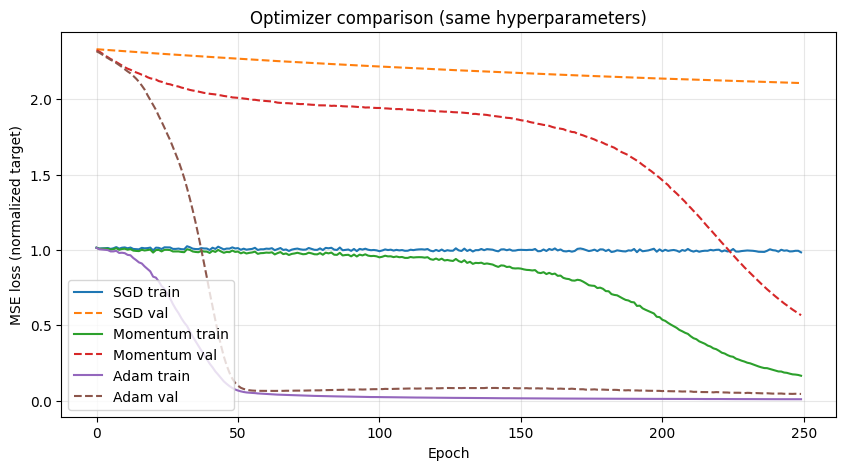

SGD      Test MSE (normalized target): 2.321796
Momentum Test MSE (normalized target): 0.665627
Adam     Test MSE (normalized target): 0.591849


In [ ]:
# Keep the training setup identical across optimizers for fair comparison
common_train_cfg = {
    'lr': 1e-4,
    'optimizer_kwargs': {
        'weight_decay': 0.01,
    },
    'scheduler_name': None,
    'epochs': 250,
    'verbose': False,
    'seed': 42,
}

optimizer_configs = {
    'SGD': {'optimizer_name': 'sgd'},
    'Momentum': {'optimizer_name': 'momentum'},
    'Adam': {'optimizer_name': 'adam'},
}

opt_histories = {}
opt_test_mse = {}

for name, cfg in optimizer_configs.items():
    out = train_model(**cfg, **common_train_cfg)
    opt_histories[name] = out['history']
    opt_test_mse[name] = out['test_mse']

print('Common config:', common_train_cfg)

plt.figure(figsize=(10, 5))
for name, hist in opt_histories.items():
    plt.plot(hist['train_loss'], label=f'{name} train')
    plt.plot(hist['val_loss'], '--', label=f'{name} val')
plt.xlabel('Epoch')
plt.ylabel('MSE loss (normalized target)')
plt.title('Optimizer comparison (same hyperparameters)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

for name, mse in opt_test_mse.items():
    print(f'{name:8s} Test MSE (normalized target): {mse:.6f}')



d. (4 points) Set learning rate schedulers using OneCycleLR, CyclicLR, and ReduceLROnPlateau. PyTorch offers learning rate schedulers to change the learning rate over time. Check this tutorial for more instruction. Observe any difference in your training.

OneCycleLR         best_val=0.021783 | best_epoch=77 | test_mse=1.038697
CyclicLR           best_val=0.058540 | best_epoch=13 | test_mse=0.265345
ReduceLROnPlateau  best_val=0.055114 | best_epoch=7 | test_mse=0.169835


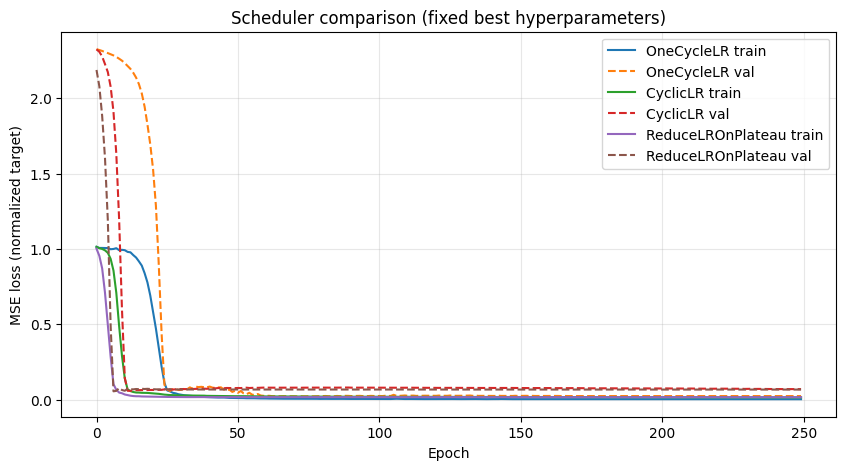

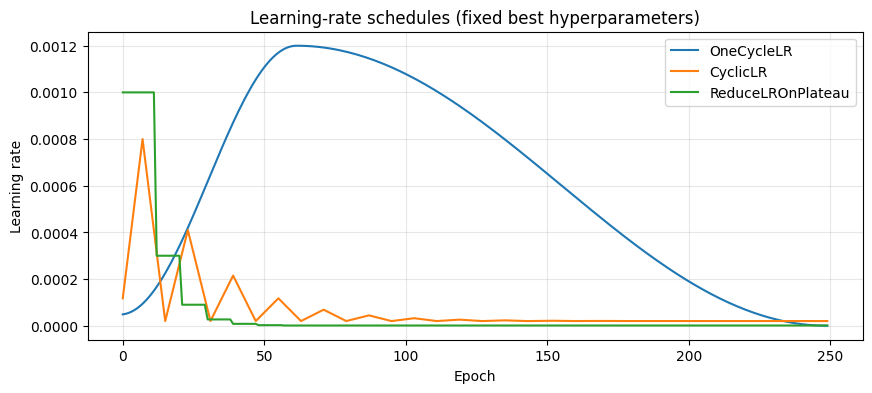

In [330]:
# Fixed best hyperparameters (chosen from previous grid-search results)
scheduler_configs = {
    'OneCycleLR': {
        'scheduler_name': 'onecycle',
        'scheduler_kwargs': {
            'max_lr': 1.2e-3,
            'pct_start': 0.25,
        },
    },
    'CyclicLR': {
        'scheduler_name': 'cyclic',
        'scheduler_kwargs': {
            'base_lr': 2e-5,
            'max_lr': 8e-4,
        },
    },
    'ReduceLROnPlateau': {
        'scheduler_name': 'plateau',
        'scheduler_kwargs': {
            'factor': 0.3,
            'patience': 5,
        },
    },
}

sch_histories = {}
sch_test_mse = {}

for name, cfg in scheduler_configs.items():
    out = train_model(
        optimizer_name='adam',
        lr=1e-3,
        epochs=250,
        verbose=False,
        **cfg,
    )
    sch_histories[name] = out['history']
    sch_test_mse[name] = out['test_mse']
    print(f"{name:18s} best_val={out['best_val_loss']:.6f} | best_epoch={out['best_epoch']+1} | test_mse={out['test_mse']:.6f}")

plt.figure(figsize=(10, 5))
for name, hist in sch_histories.items():
    plt.plot(hist['train_loss'], label=f'{name} train')
    plt.plot(hist['val_loss'], '--', label=f'{name} val')
plt.xlabel('Epoch')
plt.ylabel('MSE loss (normalized target)')
plt.title('Scheduler comparison (fixed best hyperparameters)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10, 4))
for name, hist in sch_histories.items():
    plt.plot(hist['lr'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.title('Learning-rate schedules (fixed best hyperparameters)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



### Model Design Challenge (Extra credit: Maximum 20 points) 🚀

Model & parameters
https://huggingface.co/iaaronlau/ANN2026/tree/main

Notebook:
https://github.com/iAaronLau/ANN2026/blob/master/hw1.challenge.ipynb